# Day 1 | Exercise of pandas

<p style="float:right;">
<span>By- Darpan Kattel <a href="https://darpankattel.com.np/" target="_blank">(Website)</a></span>
<br />
    <span>PUL077BCT<b>099</b></span>
</p>

## Students list
- What is the proportion of male and feamle
- What is the average height for male and female
- waht is the most common blood type
- convert height to m
- sort dataframe by gender and blood type
- create pivot table with gender in rows, blood type in column and count as values.
- calculate BMI of students

### Gathering the Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data_studentlist.csv")

In [4]:
df.head(5)

,name,gender,age,grade,absence,bloodtype,height,weight
0,Jared Diamond,M,23,3,Y,O,165.3,68.2
1,Sarah O'Donnel,F,22,2,N,AB,170.1,53.0
2,Brian Martin,M,24,4,N,B,175.0,80.1
3,David Hassel,M,23,3,N,AB,182.1,85.7
4,Clara Rodriquez,F,20,1,Y,A,168.0,49.5


In [5]:
df.sample(5)

,name,gender,age,grade,absence,bloodtype,height,weight
2,Brian Martin,M,24,4,N,B,175.0,80.1
12,Eddy Johnson,M,21,1,N,A,162.2,55.3
15,Richard Swayze,M,24,4,Y,B,168.6,70.2
7,Margareth Jones,F,23,1,N,A,176.9,55.0
10,Joshua Connor,M,24,4,Y,O,167.1,62.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       17 non-null     object 
 1   gender     17 non-null     object 
 2   age        17 non-null     int64  
 3   grade      17 non-null     int64  
 4   absence    17 non-null     object 
 5   bloodtype  17 non-null     object 
 6   height     17 non-null     float64
 7   weight     17 non-null     float64
dtypes: float64(2), int64(2), object(4)
memory usage: 1.2+ KB


In [27]:
df.describe()

,age,grade,height,weight
count,17.000000,17.000000,17.000000,17.000000
mean,22.352941,2.294118,1.700353,61.064706
std,1.169464,1.104802,0.078498,11.851685
min,20.000000,1.000000,1.552000,45.200000
25%,22.000000,1.000000,1.653000,53.000000
50%,22.000000,2.000000,1.692000,61.300000
75%,23.000000,3.000000,1.761000,68.200000
max,24.000000,4.000000,1.821000,85.700000


### What is the proportion of male and female?

In [12]:
gdf = df.groupby("gender")
gdf

Returns a `pandas.core.groupby.generic.DataFrameGroupBy` object, that is similar to DataFrame

In [10]:
female_count = gdf["name"].count()["F"]
male_count = gdf["name"].count()["M"]

In [11]:
gdf["gender"].value_counts()

gender
F     7
M    10
Name: count, dtype: int64

In [17]:
print(f"Male:Female Proportion is {male_count/female_count}")

Male:Female Proportion is 1.4285714285714286


### What is the average height for male and female?

In [14]:
gdf["height"].mean()

gender
F    166.642857
M    172.410000
Name: height, dtype: float64

In [16]:
female_height_avg = gdf["height"].mean()["F"]
male_height_avg = gdf["height"].mean()["M"]
print(female_height_avg, male_height_avg)

166.64285714285714 172.41


We could also have done `gdf.mean(numeric_only=True)["height"]["F"]` to get the female height averaged.

In [17]:
gdf.mean(numeric_only=True)["height"]["F"]

166.64285714285714

But, the former approach is much better, as there is average calculation in a single Series (`gdf["height"]`), rather than a DataFrame (`gdf`).

### What is the most common blood type?

In [19]:
df.bloodtype

0      O
1     AB
2      B
3     AB
4      A
5      O
6      O
7      A
8      B
9      B
10     O
11    AB
12     A
13     O
14     B
15     B
16     A
Name: bloodtype, dtype: object

In [20]:
print(bloodtype_counts := df['bloodtype'].value_counts())

bloodtype
O     5
B     5
A     4
AB    3
Name: count, dtype: int64


In [21]:
max_count = bloodtype_counts.max()
bloodtype_counts[bloodtype_counts == max_count].index.tolist()

['O', 'B']

Here, we obtain a list of bloodtypes, since O and B have the higher frequency.

The following approach seems easier, but it works on string (Since, O > B > AB > A), not on the bloodtype count. (The order of sorting the string is ['A', 'AB', 'B', 'O'] in python)

In [24]:
df["bloodtype"].max() # This is wrong approach as mentioned above

'O'

### Convert height to m

For this, we can use the broadcasting feature of the Panda's Series object. Here, we will divide the `df["height"]` series by 100, and the division is broadcasted to its all elements, and let's assign the converted series to the `df` DataFrame again.

In [25]:
df["height"] = df["height"]/100
df.sample(5)

,name,gender,age,grade,absence,bloodtype,height,weight
5,Jennifer Lorentz,F,21,2,N,O,1.620,52.0
2,Brian Martin,M,24,4,N,B,1.750,80.1
7,Margareth Jones,F,23,1,N,A,1.769,55.0
10,Joshua Connor,M,24,4,Y,O,1.671,62.0
3,David Hassel,M,23,3,N,AB,1.821,85.7


### Sort dataframe by gender and blood type

In [23]:
df.sort_values(["gender", "bloodtype"])

,name,gender,age,grade,absence,bloodtype,height,weight
4,Clara Rodriquez,F,20,1,Y,A,1.680,49.5
7,Margareth Jones,F,23,1,N,A,1.769,55.0
1,Sarah O'Donnel,F,22,2,N,AB,1.701,53.0
14,Linda Carter,F,22,2,N,B,1.582,45.2
5,Jennifer Lorentz,F,21,2,N,O,1.620,52.0
6,Susan Clark,F,22,1,N,O,1.552,45.3
13,Rebecah Anderson,F,23,3,N,O,1.761,53.1
12,Eddy Johnson,M,21,1,N,A,1.622,55.3
16,Andrew King,M,21,1,N,A,1.692,62.2
3,David Hassel,M,23,3,N,AB,1.821,85.7


It is observed to be sorted in Ascending, but could be done in reverse order setting the `ascending` argument to `False`, which is by default set to `True`, as in the example below.

In [31]:
df.sort_values("age", ascending=False)

,name,gender,age,grade,absence,bloodtype,height,weight
2,Brian Martin,M,24,4,N,B,1.750,80.1
15,Richard Swayze,M,24,4,Y,B,1.686,70.2
10,Joshua Connor,M,24,4,Y,O,1.671,62.0
0,Jared Diamond,M,23,3,Y,O,1.653,68.2
7,Margareth Jones,F,23,1,N,A,1.769,55.0
13,Rebecah Anderson,F,23,3,N,O,1.761,53.1
8,John Bertsch,M,23,3,N,B,1.785,64.2
3,David Hassel,M,23,3,N,AB,1.821,85.7
6,Susan Clark,F,22,1,N,O,1.552,45.3
1,Sarah O'Donnel,F,22,2,N,AB,1.701,53.0


### Create pivot table with gender in rows, blood type in column and count as values.

In [34]:
df.pivot_table(
    values="age",
    index="gender",
    columns="bloodtype",
    aggfunc="count", # this is by default mean
    fill_value=0
)

bloodtype,A,AB,B,O
gender,,,,
F,2,1,1,3
M,2,2,4,2


Here, `index` argument means the rows, values is the value to be shown on the table, where as `aggfunc` is the aggregate func (mean, median, mode, sum, count, max, min, std, var, skew and kurt) to be used in the value.

### Calculate BMI of students

Body Mass Index = Weight (in kg) / Height (in m)<sup>2</sup>

In [38]:
bmi = df["weight"] / df["height"] ** 2

In [44]:
bmi

0     24.959660
1     18.317544
2     26.155102
3     25.844071
4     17.538265
5     19.814053
6     18.806794
7     17.575473
8     20.149236
9     19.767046
10    22.204387
11    23.395062
12    21.019551
13    17.122840
14    18.060321
15    24.695736
16    21.726495
dtype: float64

## Titanic dataset
- How may passengers do we have the data for?
- What are the different columns present in the dataset
- What is the datatype of different columns
- How many datapoints are missing in each of the columns?
    - How could we fill those values?
- What was the maximum age of passenger? Minimum age?
- What was the minimum fare? The Maximum fare? the average fare?
- What was the approximate year in which the passengers were born?
- What % of passenger survived
- How many male/female were on board, how many passenger were in each class?
- What was the propotion of male to female passenger
- What was the proportion of male/female based on survival
- What was the chance of survival based on:
    - sex
    - age group (<16, 16-50, > 50)
    - passenger class
    - Combination of above?
- Show the age distribution per ticket class, per sex
- Distribution of ticket price by class


In [53]:
df = pd.read_csv("data_titanic.csv")

In [54]:
df.shape

(891, 12)

In [55]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
824,825,0,3,"Panula, Master. Urho Abraham",male,2.0,4,1,3101295,39.6875,NaN,S
129,130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.9750,NaN,S
747,748,1,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,NaN,S
593,594,0,3,"Bourke, Miss. Mary",female,NaN,0,2,364848,7.7500,NaN,Q
816,817,0,3,"Heininen, Miss. Wendla Maria",female,23.0,0,0,STON/O2. 3101290,7.9250,NaN,S


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [58]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### How may passengers do we have the data for?

In [59]:
df.PassengerId.count()

891

Or, we could also use the `shape` attribute.

In [62]:
df.shape

(891, 12)

In [63]:
df.shape[0]

891

### What are the different columns present in the dataset?

In [64]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [66]:
df.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [42]:
list(df.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

### What is the datatype of different columns?

In [54]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### How many datapoints are missing in each of the columns?
- How could we fill those values?

In [77]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
print(nullcount := df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [83]:
nullcount["Age"], nullcount["Cabin"], nullcount["Embarked"]

(177, 687, 2)

We could fill those values using the `fillna()` method. But, for numeric values, we could use aggregate function, like, `'mean'`. `'median'`, `'mode'`, etc. to fill the values. For string columns, we could write something like `'Unknown'` there.

#### Filling the `"Age"` column with the mean value of the remaining data.

In [115]:
df["Age"] = df["Age"].fillna(df["Age"].median())

#### Filling the `"Cabin"` column with `"Unknown"`.

In [116]:
df["Cabin"] = df["Cabin"].fillna("Unknown")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


#### Filling the `"Embarked"` column with the `'mode'` value of the remaining data.

In [117]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [118]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Now, there are no null data.

### What was the maximum age of passenger? Minimum age?

In [119]:
df["Age"].max()

80.0

In [120]:
df[df["Age"] == df["Age"].min()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.0,0,2,248738,29.0000,Unknown,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.0,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.0,2,1,2666,19.2583,Unknown,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.0,2,1,2666,19.2583,Unknown,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.0,1,1,250649,14.5000,Unknown,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.0,0,1,2625,8.5167,Unknown,C
831,832,1,2,"Richards, Master. George Sibley",male,0.0,1,1,29106,18.7500,Unknown,S


In [121]:
df["Age"].min()

0.0

### What was the minimum fare? The Maximum fare? the average fare?

In [123]:
df["Fare"].min()

0.0

In [124]:
df["Fare"].max()

512.3292

In [125]:
df["Fare"].mean()

32.204207968574636

In [129]:
df[df["Fare"] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,Unknown,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,Unknown,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,29.0,0,0,239853,0.0,Unknown,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,Unknown,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,29.0,0,0,239853,0.0,Unknown,S
466,467,0,2,"Campbell, Mr. William",male,29.0,0,0,239853,0.0,Unknown,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29.0,0,0,239854,0.0,Unknown,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,Unknown,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,29.0,0,0,112052,0.0,Unknown,S


In [133]:
df[df["Fare"] == 0]["PassengerId"].count()

15

### What was the approximate year in which the passengers were born?

We kow that, the Titanic sank on 15 April **1912** in the North Atlantic Ocean.

In [139]:
dob = 1912 - df["Age"].astype(int)
dob

0      1890
1      1874
2      1886
3      1877
4      1877
       ... 
886    1885
887    1893
888    1883
889    1886
890    1880
Name: Age, Length: 891, dtype: int32

### What % of passenger survived

In [141]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [146]:
dead, survived = df["Survived"].value_counts().to_list()
print(dead, survived)

549 342


In [147]:
survival_rate = survived / (survived + dead)
survival_rate * 100

38.38383838383838

This can also be verified by the mean of the `'survival'` column, in this case.

In [149]:
df["Survived"].mean() * 100

38.38383838383838

### How many male/female were on board, how many passenger were in each class?

In [155]:
male, female = df["Sex"].value_counts().to_list()

In [156]:
male, female

(577, 314)

In [159]:
class3, class2, class1 = df["Pclass"].value_counts().to_list()

In [160]:
class3, class2, class1

(491, 216, 184)

### What was the propotion of male to female passenger?

In [161]:
male, female = df["Sex"].value_counts().to_list()

In [162]:
male / female 

1.8375796178343948

Or, we could also use `normalize`.

In [164]:
df["Sex"].value_counts(normalize=True) * 100

Sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64

Here, 64% are male and 35% are female, which is same as above.

**Conslusion**: There were almost double number of males against females.

### What was the proportion of male/female based on survival

In [169]:
df.groupby("Survived")["Sex"].value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: count, dtype: int64

In [171]:
df.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

### What was the chance of survival based on:
#### sex

In [196]:
df.groupby("Sex")["Survived"].mean() * 100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [195]:
female_chance, male_chance = (df.groupby("Sex")["Survived"].mean() * 100).to_list()
female_chance, male_chance

(74.20382165605095, 18.890814558058924)

#### age group (<16, 16-50, > 50)

In [199]:
pd.cut(df["Age"], bins=[0, 16, 50, 81]).head()

0    (16, 50]
1    (16, 50]
2    (16, 50]
3    (16, 50]
4    (16, 50]
Name: Age, dtype: category
Categories (3, interval[int64, right]): [(0, 16] < (16, 50] < (50, 81]]

In [200]:
df["AgeGroup"] = pd.cut(df["Age"], bins=[0, 16, 50, 81])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,"(16, 50]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(16, 50]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,"(16, 50]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(16, 50]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,"(16, 50]"


In [204]:
df["AgeGroup"] = pd.cut(df["Age"], bins=[0, 16, 50, 81], labels=["<16", "16-50", ">50"])
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,Unknown,S,16-50
768,769,0,3,"Moran, Mr. Daniel J",male,29.0,1,0,371110,24.1500,Unknown,Q,16-50
67,68,0,3,"Crease, Mr. Ernest James",male,19.0,0,0,S.P. 3464,8.1583,Unknown,S,16-50
594,595,0,2,"Chapman, Mr. John Henry",male,37.0,1,0,SC/AH 29037,26.0000,Unknown,S,16-50
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,Unknown,S,>50


In [208]:
df.groupby("AgeGroup")["Survived"].mean() * 100

AgeGroup
<16      51.612903
16-50    36.451169
>50      34.375000
Name: Survived, dtype: float64

**Conclusion**: Children (age < 16) were prioritized over other

#### passenger class

In [207]:
df.groupby("Pclass")["Survived"].mean() * 100

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

**Conclusion**: The highest paying class (Pclass 1) were prioritized over others.

#### Combination of above?

In [215]:
chances = df.groupby(["Sex", "AgeGroup", "Pclass"])["Survived"].mean()
chances

Sex     AgeGroup  Pclass
female  <16       1         0.833333
                  2         1.000000
                  3         0.516129
        16-50     1         0.973333
                  2         0.920635
                  3         0.481818
        >50       1         1.000000
                  2         0.666667
                  3         1.000000
male    <16       1         1.000000
                  2         0.750000
                  3         0.250000
        16-50     1         0.397849
                  2         0.082353
                  3         0.122924
        >50       1         0.192308
                  2         0.083333
                  3         0.000000
Name: Survived, dtype: float64

**Since, the above data is not that much understandable, let's visualize it, using a heatmap.**

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt

In [218]:
chances = chances.reset_index()
pivot_table = chances.pivot_table(index=['Sex', 'AgeGroup'], columns='Pclass', values='Survived')

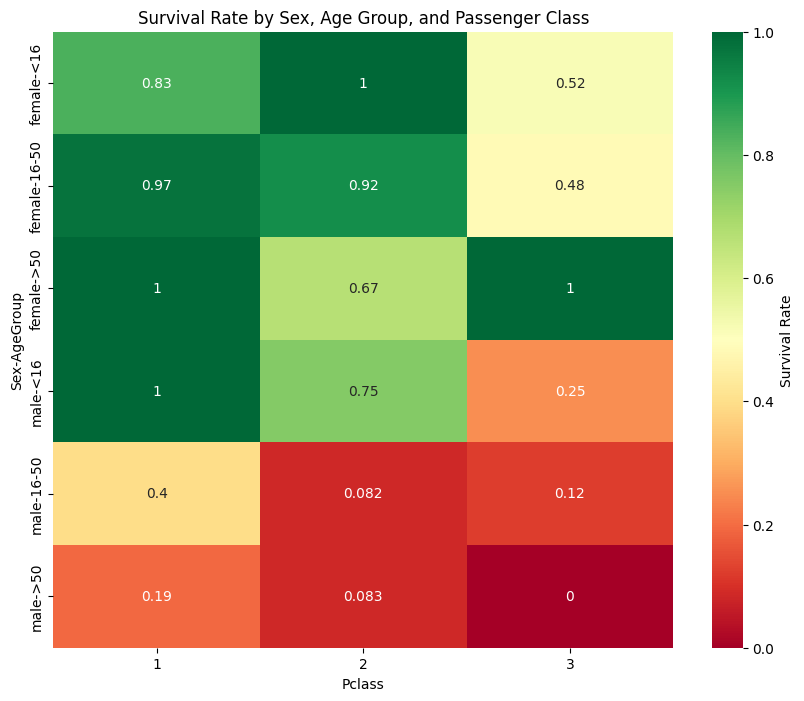

In [220]:
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='RdYlGn', cbar_kws={'label': 'Survival Rate'}, vmin=0, vmax=1)
plt.title('Survival Rate by Sex, Age Group, and Passenger Class')
plt.show()

**We can visualize data using matplotlib and seaborn, when we want to get insights and conslusions from data.**

### Show the age distribution per ticket class, per sex

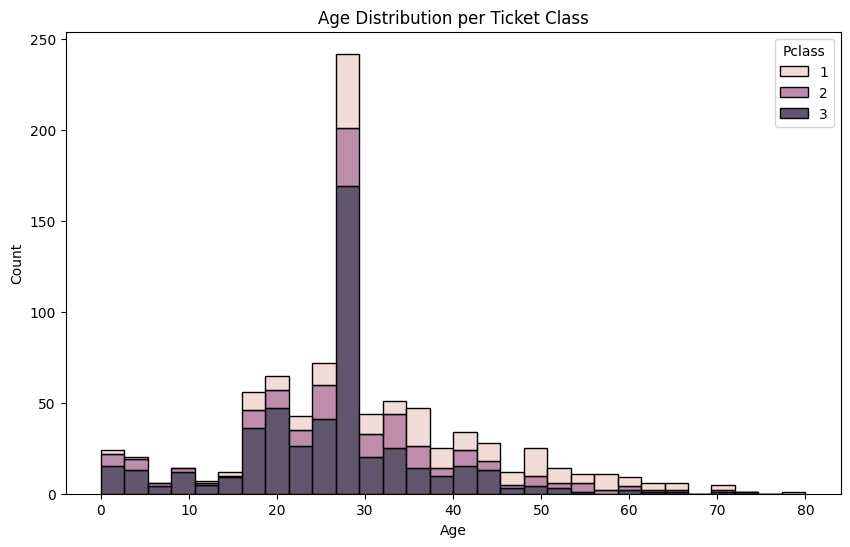

In [223]:
# Age distribution per class
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Pclass', multiple='stack', kde=False)
plt.title('Age Distribution per Ticket Class')
plt.show()

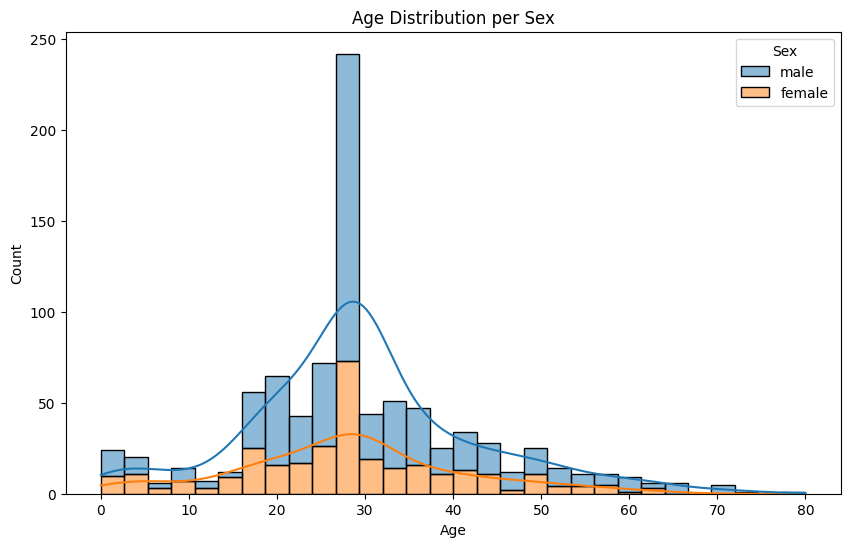

In [224]:
# Age distribution per sex
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Sex', multiple='stack', kde=True)
plt.title('Age Distribution per Sex')
plt.show()

### Distribution of ticket price by class

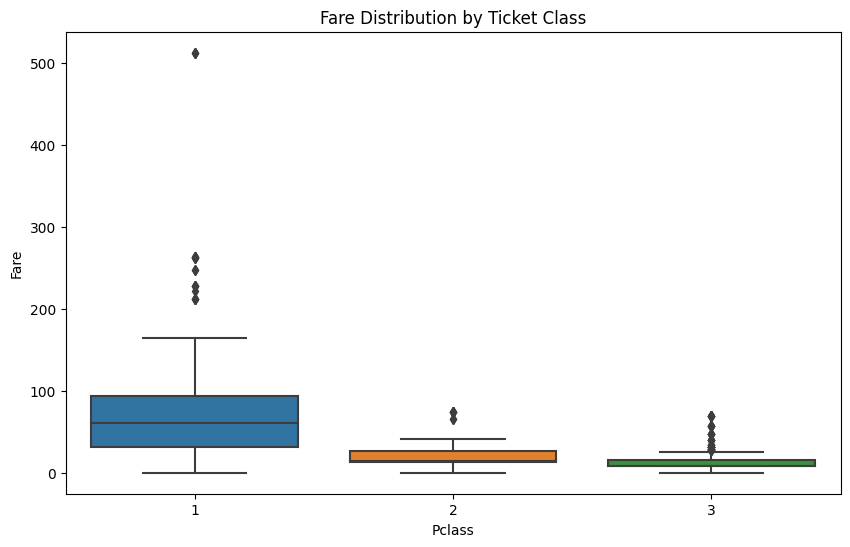

In [226]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Ticket Class')
plt.show()

## Curiosity

- Which ticket class did most of the largest families get? And which ticket class has the lowest proportion of female passengers who travelled solo out of all the female passengers in that class?
- Who was the oldest/youngest passenger
- Who were the oldest/youngest to survive/ die
    - Oldest/ youngest by sex, class
- How many doctors were on board?

### Which ticket class did most of the largest families get? And which ticket class has the lowest proportion of female passengers who travelled solo out of all the female passengers in that class?

### Who was the oldest/youngest passenger

### Who were the oldest/youngest to survive/ die
- Oldest/ youngest by sex, class

### How many doctors were on board?

In [229]:
# Look for passengers with "Dr." in their name
doctors_on_board = df[df['Name'].str.contains('Dr.', regex=False)]
doctors_on_board

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,16-50
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,Unknown,S,>50
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,Unknown,S,16-50
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,16-50
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,Unknown,S,16-50
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,29.0,0,0,112379,39.6000,Unknown,C,16-50
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,16-50


In [233]:
doctors_on_board.shape[0]

7